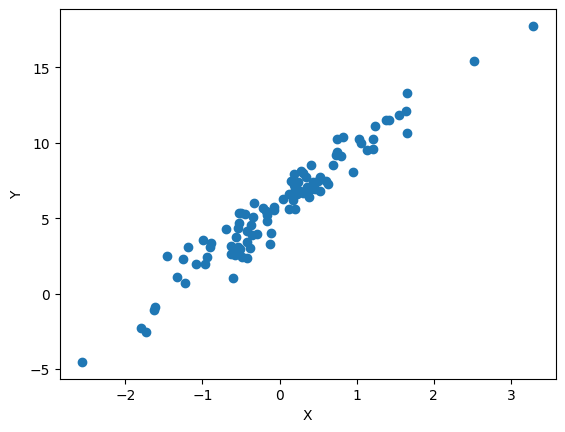

initial weight : [-0.36775025  1.28988579 -1.60337144  1.3016858  -2.55182047 -0.17162308
 -0.12867027  1.82373768  1.02969641  0.0792231   1.0628505   0.13831401
  0.14177166 -0.50913763  0.45848671 -0.53726658 -0.34379811 -1.43581384
 -0.28002481 -0.2865309   0.68084314  2.3139838  -1.96892963 -1.11461815
 -0.5476491  -0.7477445  -1.41659657  0.28667502  0.14199059 -0.86889876
  0.44642831 -1.51911219 -0.71157967  1.07952051  0.2252935  -0.29347664
 -0.26341753 -0.8370197  -0.16826907  0.39113487 -0.40900502  0.88664238
 -1.20199543  0.09082371 -1.13860785 -0.17731348 -1.92565641 -0.92136066
 -0.98278607  1.35127037  0.57281688 -0.70218315  1.38623081 -0.60755451
 -1.73740539  1.49447976 -1.29883267 -0.01633724 -1.07836375  1.18986478
 -0.65502857 -0.49493172 -0.44720098 -0.32036857  0.79676714  0.03653078
  1.02355931  0.74759009 -0.32744154 -1.09073036  0.00962303  0.05080726
  0.49424619 -0.69453439  0.10553343  0.70781348 -0.24484685 -0.84545922
  0.43675997 -2.20042691 -0.900197

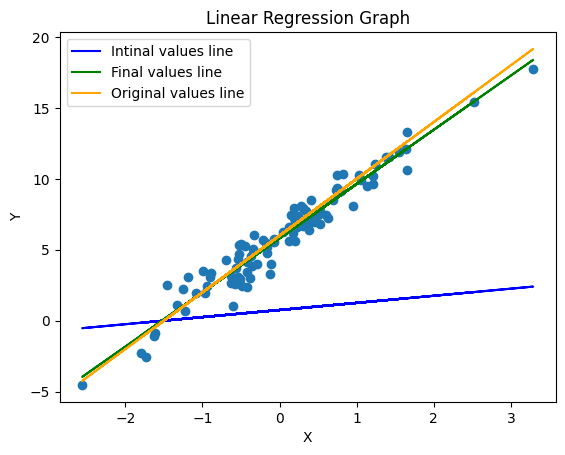

In [1]:
from numpy.random import normal
import matplotlib.pyplot as plt
import random
a = 6
b = 4

N = 100
X = normal(loc=0.0, scale=1.0, size=N)
W = normal(loc=0.0, scale=1.0, size=N)
Y = a + b*X + W

# plot data
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print("initial weight :",W)


def mean_square_error(X, Y, w1, w2):
    n = len(X)
    total_error = 0


    for i in range(n):
        total_error = total_error + (w1 + w2 * X[i] - Y[i]) ** 2
    mse = total_error / n
    return mse
def gradient_mean_square_error(X, Y, w1, w2):
    n = len(X)
    partial_derivative_w1 = 0
    partial_derivative_w2 = 0
    for i in range(n):
        partial_derivative_w1 += 2 * (w1 + w2 * X[i] - Y[i])
        partial_derivative_w2 += 2 * (w1 + w2 * X[i] - Y[i]) * X[i]


    partial_derivative_w1 = partial_derivative_w1 / n
    partial_derivative_w2 = partial_derivative_w2 / n

    return partial_derivative_w1 , partial_derivative_w2

def gradient_descent(X, Y, w1, w2, learning_rate, num_iterations):

    mse_list = []

    for i in range(num_iterations):
        #We use our gradient_mean_square_error to
        # calculate partial derivatives of w1 and w2 and update them
        partial_derivative_w1, partial_derivative_w2 = gradient_mean_square_error(X, Y, w1, w2)
        w1 -= learning_rate * partial_derivative_w1
        w2 -= learning_rate * partial_derivative_w2

        mse_list.append(mean_square_error(X, Y, w1, w2))
    #return the final calculated derivatives
    return w1, w2 ,mse_list
    #Generate random value for w1 and w2 between 0 and 1
initial_w1 = random.uniform(0, 1)
initial_w2 = random.uniform(0, 1)

#define the learning rate and no of iterations we need to calculate
learning_rate = 0.1
iterations = 1000

# Perform gradient descent using our implemented gradient descent function
final_w1, final_w2,mse_final_list = gradient_descent(X, Y, initial_w1, initial_w2, learning_rate, iterations)

#Print the original and new calculated values of a and b
print("Original value a = ", a , " New calculated value w1 = ",final_w1)
print("Original value b = ", b , " New calculated value w1 = ",final_w2)
def predict(Y,X,w1,w2):
    Y_pred = []
    for x in X:
        val = w2*x + w1
        Y_pred.append(val)
    return Y_pred
    plt.figure(figsize=(10, 10))

# plot data as given above
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

get_preds = predict(Y,X,initial_w1,initial_w2)
# plot line graph using intital values of w1 and w2
plt.plot(X, get_preds, color='b' ,label = "Intinal values line")

get_preds = predict(Y,X,final_w1,final_w2)
# plot line graph using final values of w1 and w2
plt.plot(X, get_preds, color='g', label = "Final values line")

get_preds = predict(Y,X,a,b)
# plot line graph using final values of a and b
plt.plot(X, get_preds, color='orange', label = "Original values line")

#Plot the grpah
plt.title("Linear Regression Graph")
plt.legend()
plt.show()




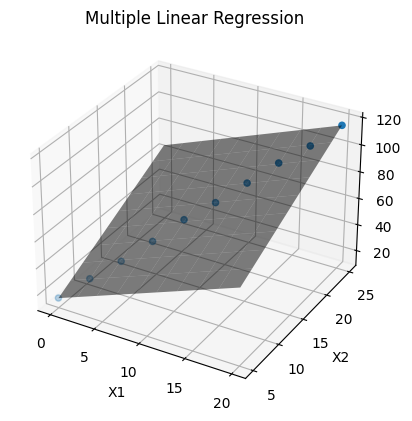

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random

random.seed(40)
num_points = 10

# Generate two sets of synthetic data
x1 = np.linspace(0, 20, num_points)
x2 = np.linspace(5, 25, num_points)
y = 2 * x1 + 3 * x2 + 1 + np.random.normal(0, 1, num_points)

X = np.column_stack((x1, x2))
model = LinearRegression().fit(X, y)
predicted_y = model.predict(X)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 'predicted_y': predicted_y})
data.to_csv('linear_regression_data_multi_features.csv', index=False)

x1_mesh, x2_mesh = np.meshgrid(x1, x2)
predicted_y_mesh = model.predict(np.column_stack((x1_mesh.ravel(), x2_mesh.ravel())))
predicted_y_mesh = predicted_y_mesh.reshape(x1_mesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, label='Data')
ax.plot_surface(x1_mesh, x2_mesh, predicted_y_mesh, color='black', alpha=0.5, label='Regression')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Multiple Linear Regression')
plt.show()

